In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter
import numpy as np
import cv2


Implement a function that performs non-maximum suppression. You can leave it for the end

In [2]:
def nonmax_suppression(harris_resp, thr, halfwidth=2):
    # Outputs:
    # 1) cornersy: list with row coordinates of identified corner pixels.
    # 2) cornersx: list with respective column coordinates of identified corner pixels.
    # Elements from the two lists with the same index must correspond to the same corner.
    
    cornersy = []
    cornersx = []
    h, w = im.shape[:2]
    for y in range(halfwidth, h-halfwidth):
        for x in range(halfwidth, w-halfwidth):
            if harris_resp[y, x] < thr:
                continue

            neighborhood = harris_resp[y-halfwidth:y+halfwidth+1, x-halfwidth:x+halfwidth+1]
            
            if neighborhood.max() > harris_resp[y, x]:
                continue
                
            cornersx.append(x)
            cornersy.append(y)

    return cornersy, cornersx

Implement the main part of the exercise

In [3]:
# Define parameters
sigma_w = 2.0
sigma_d = 2.0
kappa = 0.04
rot_angle = 0
thresh = 800

# Read the image
im = cv2.imread('/home/cvcourse/pics/CircleLineRect.png', 0)
im = im.astype('float')

# Rotation of the image
if rot_angle != 0:
    im = rotate(im, rot_angle)

# Implement Harris corners
# Useful functions: gaussian_filter1d, gaussian_filter
I_x = gaussian_filter1d(im, sigma_d, order=0, axis=0)
I_x = gaussian_filter1d(I_x, sigma_d, order=1, axis=1)

I_y = gaussian_filter1d(im, sigma_d, order=0, axis=1)
I_y = gaussian_filter1d(I_y, sigma_d, order=1, axis=0)

A_11 = I_x ** 2
A_22 = I_y ** 2
A_12 = I_x * I_y

A_11 = gaussian_filter(A_11, sigma_w)
A_22 = gaussian_filter(A_22, sigma_w)
A_12 = gaussian_filter(A_12, sigma_w)

det = A_11*A_22 - A_12*A_12
trc = A_11 + A_22
H = det - kappa * trc * trc
corn = nonmax_suppression(H,thresh,2)


Visualization of the results

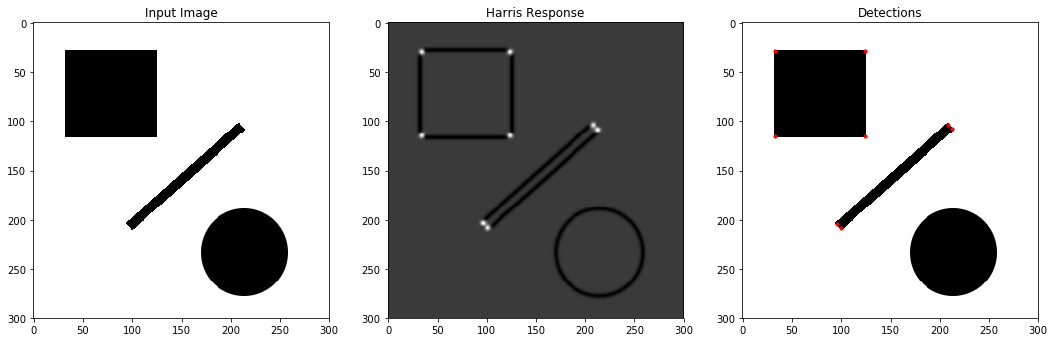

In [4]:
# Plotting of results
# No need to change it
plt.close("all")
plt.ion()
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Harris Response")
ax_arr[2].set_title("Detections")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(H, cmap='gray')
ax_arr[2].imshow(im, cmap='gray')
ax_arr[2].scatter(x=corn[1], y=corn[0], c='r', s=10)